In [12]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re

params

In [19]:
file_path = 'results/evaluation.json'  # Path to the results file
model_name = 'gpt-4'                   # Model name, e.g., 'gpt-4'
scoring_template = 'scoring_1_10_cot'      # Scoring template

In [ ]:
score_mapping = {
    "badges" : {
        'Novice Badge': 1,
        'Apprentice Badge': 2,
        'Journeyman Badge': 3,
        'Craftsman Badge': 4,
        'Artisan Badge': 5,
        'Expert Badge': 6,
        'Master Badge': 7,
        'Sage Badge': 8,
        'Oracle Badge': 9,
        'Legend Badge': 10
    }
}

read data

In [20]:
# NOTE: doesn't work well on longer responses because I just regex 
# the score. It's probably just easier to extract the scores
# manually if you know the scoring template generates
# long responses

with open(file_path, 'r') as file:
    data_json = json.load(file)

eval_data = data_json[model_name][scoring_template]

misspelled_percentages = []
scores = []

for item in eval_data:
    misspelled_percentages.append(item["misspelled_percentage"])
    resp = item["response"]
    try:
        score = int(resp.split(":")[1].strip())
    except ValueError:
        numbers = re.findall(r'\d+', resp)
        score = int(numbers[-1])
    scores.append(score)

visualize

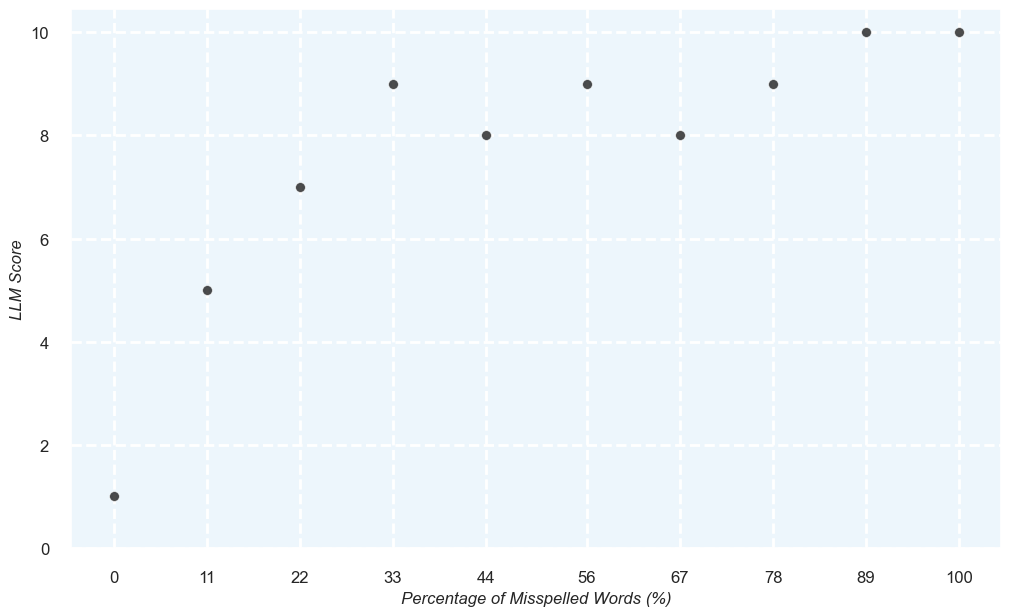

In [23]:
sns.set(style="whitegrid", palette="muted")

fig = plt.figure(figsize=(12, 7))

sns.set(rc={'axes.facecolor':'#edf6fc'})
ax = sns.scatterplot(x=misspelled_percentages, y=scores, s=50, color="black", alpha=0.7)

plt.xlabel('Percentage of Misspelled Words (%)', fontsize=12, style='italic')
plt.ylabel('LLM Score', fontsize=12, style='italic')

plt.xticks([0, 11, 22, 33, 44, 56, 67, 78, 89, 100], fontsize=12)
plt.yticks([0, 2, 4, 6, 8, 10], fontsize=12)

ax.tick_params(axis='both', which='major', pad=10)

plt.grid(True, linestyle='--', linewidth=2, alpha=1)

plt.savefig(f"figures/{model_name}_{scoring_template}.png")